In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from os import path

In [27]:
train_df = pd.read_csv('train.csv')

In [29]:
train_df.rename(columns={ '1stFlrSF':'FirstFlrSF' },inplace=True)

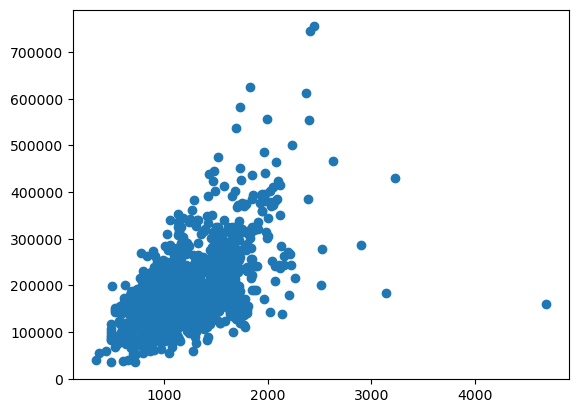

In [30]:
fig, ax = plt.subplots()
x = train_df
ax.scatter(x['FirstFlrSF'],x['SalePrice'])

In [31]:
def estimate_ols(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    b1 = np.sum(np.multiply(x - x_mean, y - y_mean)) / np.inner(x-x_mean,x-x_mean)
    b0 = y_mean - b1*x_mean

    return b0, b1

In [32]:
X = train_df['FirstFlrSF'].to_numpy()
y = train_df['SalePrice'].to_numpy()

X = sm.add_constant(X)
mod = sm.OLS(y,X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Sat, 20 May 2023   Prob (F-statistic):          5.39e-147
Time:                        13:32:48   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.617e+04   5245.728      6.896      0.000    2.59e+04    4.65e+04
x1           124.5006      4.282     29.078      0.000     116.102     132.899
==============================================================================
Omnibus:                      373.497   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.199
Skew:                           0.997   Prob(JB):                         0.00
Kurtosis:                       9.317   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = train_df['FirstFlrSF'].to_numpy()
y = train_df['SalePrice'].to_numpy()

b0, b1 = estimate_ols(X,y)

In [ ]:
fig, ax = plt.subplots()
x = train_df
ax.scatter(x['FirstFlrSF'],x['SalePrice'])
ax.axline((0,res.params[0]),(-res.params[0]/res.params[1],0),color='black')

In [ ]:
def rss(pred,y):
    diff = y - pred

    return np.inner(diff,diff)

In [ ]:
def rse(x,b0,b1,std,n,pred):
    return np.sqrt( rss( pred,generate_linear_funct(x,b0,b1,std,real=True) )/(n-2) )

In [ ]:
def estimate_variance(y,n,pred):
    return rss( pred,y )/(n-2)

In [ ]:
def se_b0(x,n,variance):
    x_mean = np.mean(x)
    return variance*(1/n + x_mean**2 / np.inner( x-x_mean,x-x_mean ))

In [ ]:
def se_b1(x,variance):
    x_mean = np.mean(x)
    return variance/np.inner( x-x_mean,x-x_mean )

In [ ]:
n = X.shape[0]
pred = res.predict()

se0 = se_b0(X,n,estimate_variance( y, n,pred))
seb1 = se_b1(X,estimate_variance( y,n,pred))


print('Standard error: ',(np.sqrt(se0), np.sqrt(seb1)))
print('Confidence interval for b0: ',(b0 - 2*np.sqrt(se0), b0 + 2*np.sqrt(se0)))
print('Confidence interval for b1: ',(b1 - 2*np.sqrt(seb1), b1 + 2*np.sqrt(seb1)))

In [ ]:
X = sm.add_constant(X)
mod = sm.OLS(y,X)
res = mod.fit()
res.summary()